# SALARY PROJECT

## ----------------------------------------------------- OVERVIEW -----------------------------------------------------

# Predict the salary of the employee using the features provided in the data. .       Here we will make it as a regression problem .. and the label column will be 'salary'    . 


# -----------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

##### loading the dataset

In [2]:
dff=pd.read_csv('salary1.csv')
dff

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
type(dff)

pandas.core.frame.DataFrame

In [4]:
dff.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
dff.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [6]:
dff.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
94,Prof,B,21,20,Male,123683
208,AsstProf,B,7,2,Male,91300
253,AsstProf,A,4,2,Female,77500
122,Prof,A,24,22,Male,97262
311,Prof,A,14,9,Male,108100


In [7]:
dff.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
dff.shape

(397, 6)

# -------------------------------------------------------------------------------------------------

# NULL VALUE

In [9]:
dff.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [10]:
dff.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

###### Now present it  into heatmap

<AxesSubplot:>

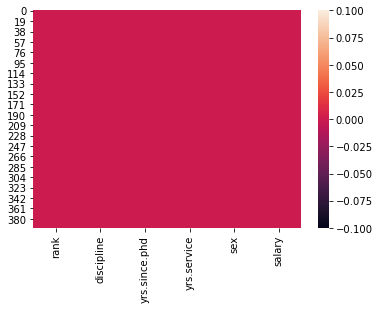

In [11]:
sns.heatmap(dff.isnull())

###### So here we can clearly see that there is no null value here 

# ------------------------------------------------------------------------------------------------------------

# EDA (Exploratory Data Analysis)

In [12]:
dff.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [13]:
dff['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [14]:
dff['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

<AxesSubplot:xlabel='rank', ylabel='count'>

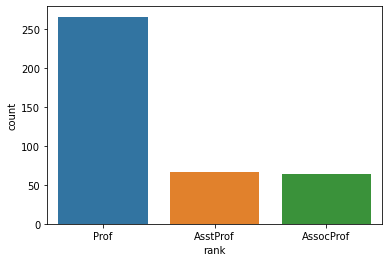

In [15]:
sns.countplot(dff["rank"])


<AxesSubplot:xlabel='rank', ylabel='salary'>

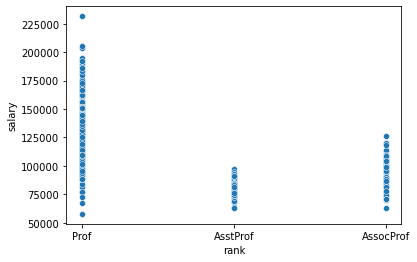

In [16]:
sns.scatterplot(x='rank',y='salary',data=dff)

###### Here we can clearly see that the rank of professor(Prof) is offered the maximum salary and then to AssociateProfessor(AssocProf)...and the least is offered to assistanceProfessor(AsstProf) ....

In [17]:
dff['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

<AxesSubplot:xlabel='discipline', ylabel='count'>

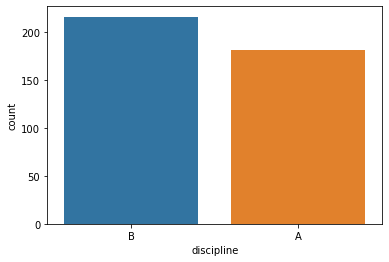

In [18]:
sns.countplot(dff["discipline"])


<AxesSubplot:xlabel='discipline', ylabel='salary'>

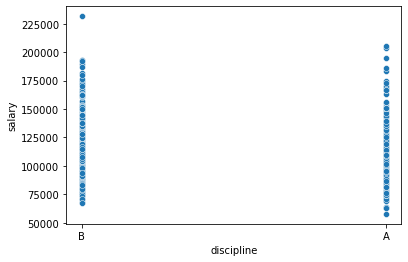

In [19]:
sns.scatterplot(x='discipline',y='salary',data=dff)

######  from 60000 to 19000 the data is equally distributed in this area 

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

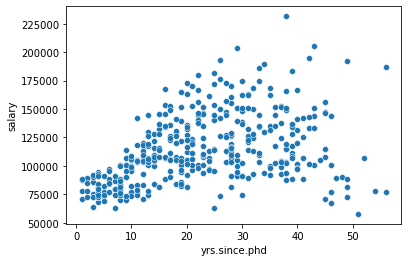

In [20]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=dff)

###### we can see the maximum year the person is working as a phd is 0 to 60 year but the average year of working starts from 0 to 40 year                and as the Experience or years since phd increases salary aslo increase

<AxesSubplot:xlabel='yrs.since.phd', ylabel='yrs.service'>

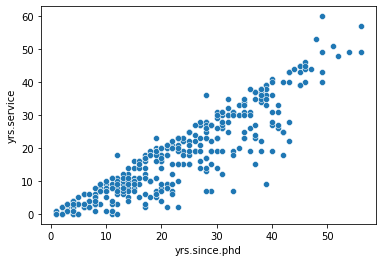

In [21]:
sns.scatterplot(x='yrs.since.phd',y='yrs.service',data=dff)

####  yrs.since.phd AND yrs.service can act as a Experience .. We can clearly see that there is positive relationship between years since phd and year in service .. year since phd can also act as a Experience if a person is working after completing phd ..and years in service clearly means it is Experience

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

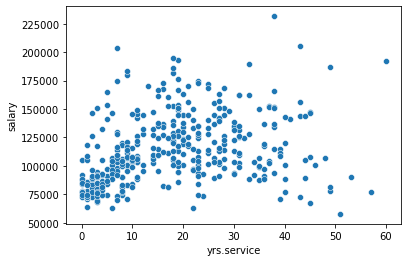

In [22]:
sns.scatterplot(x='yrs.service',y='salary',data=dff)

###### we can see the maximum year the person is working as a phd is 0 to 60 year but the average year of working starts from 0 to 40 year as mentioned also in 2 plots above

In [23]:
dff['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

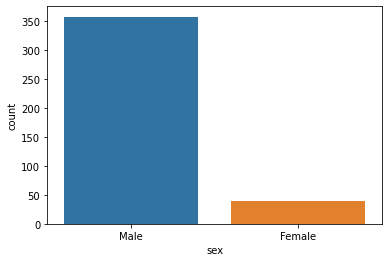

In [24]:
sns.countplot(dff['sex'])

###### Here we can see more males are doing PHD as compared to females . .

# Now lets plot all columns together by pairplot

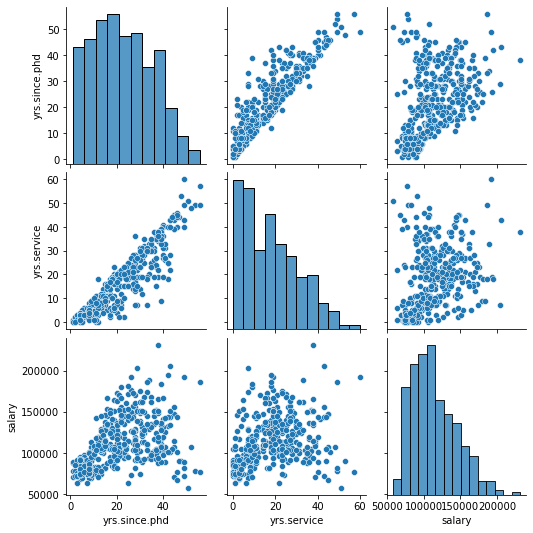

In [25]:
import matplotlib.pyplot as plt
sns.pairplot(dff)
plt.savefig('pairplot.png')
plt.show()


#In pairplot No catagorical data's are plotted thats why we can see that 'rank', 'sex' and 'discipline' are not plotted ..

# Data cleaning and wrangling

In [26]:
dff.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
# Now apply label eEncoder on all catagorical data to convert in into integer

le=LabelEncoder()

# for Single columns at a time:- 
# df['City']=le.fit_transform(df['City'])

# for more than one columns at a time:-

list1=['rank','discipline','sex']

for i in list1:
    dff[i]=le.fit_transform(dff[i].astype(str))
    
    
dff

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


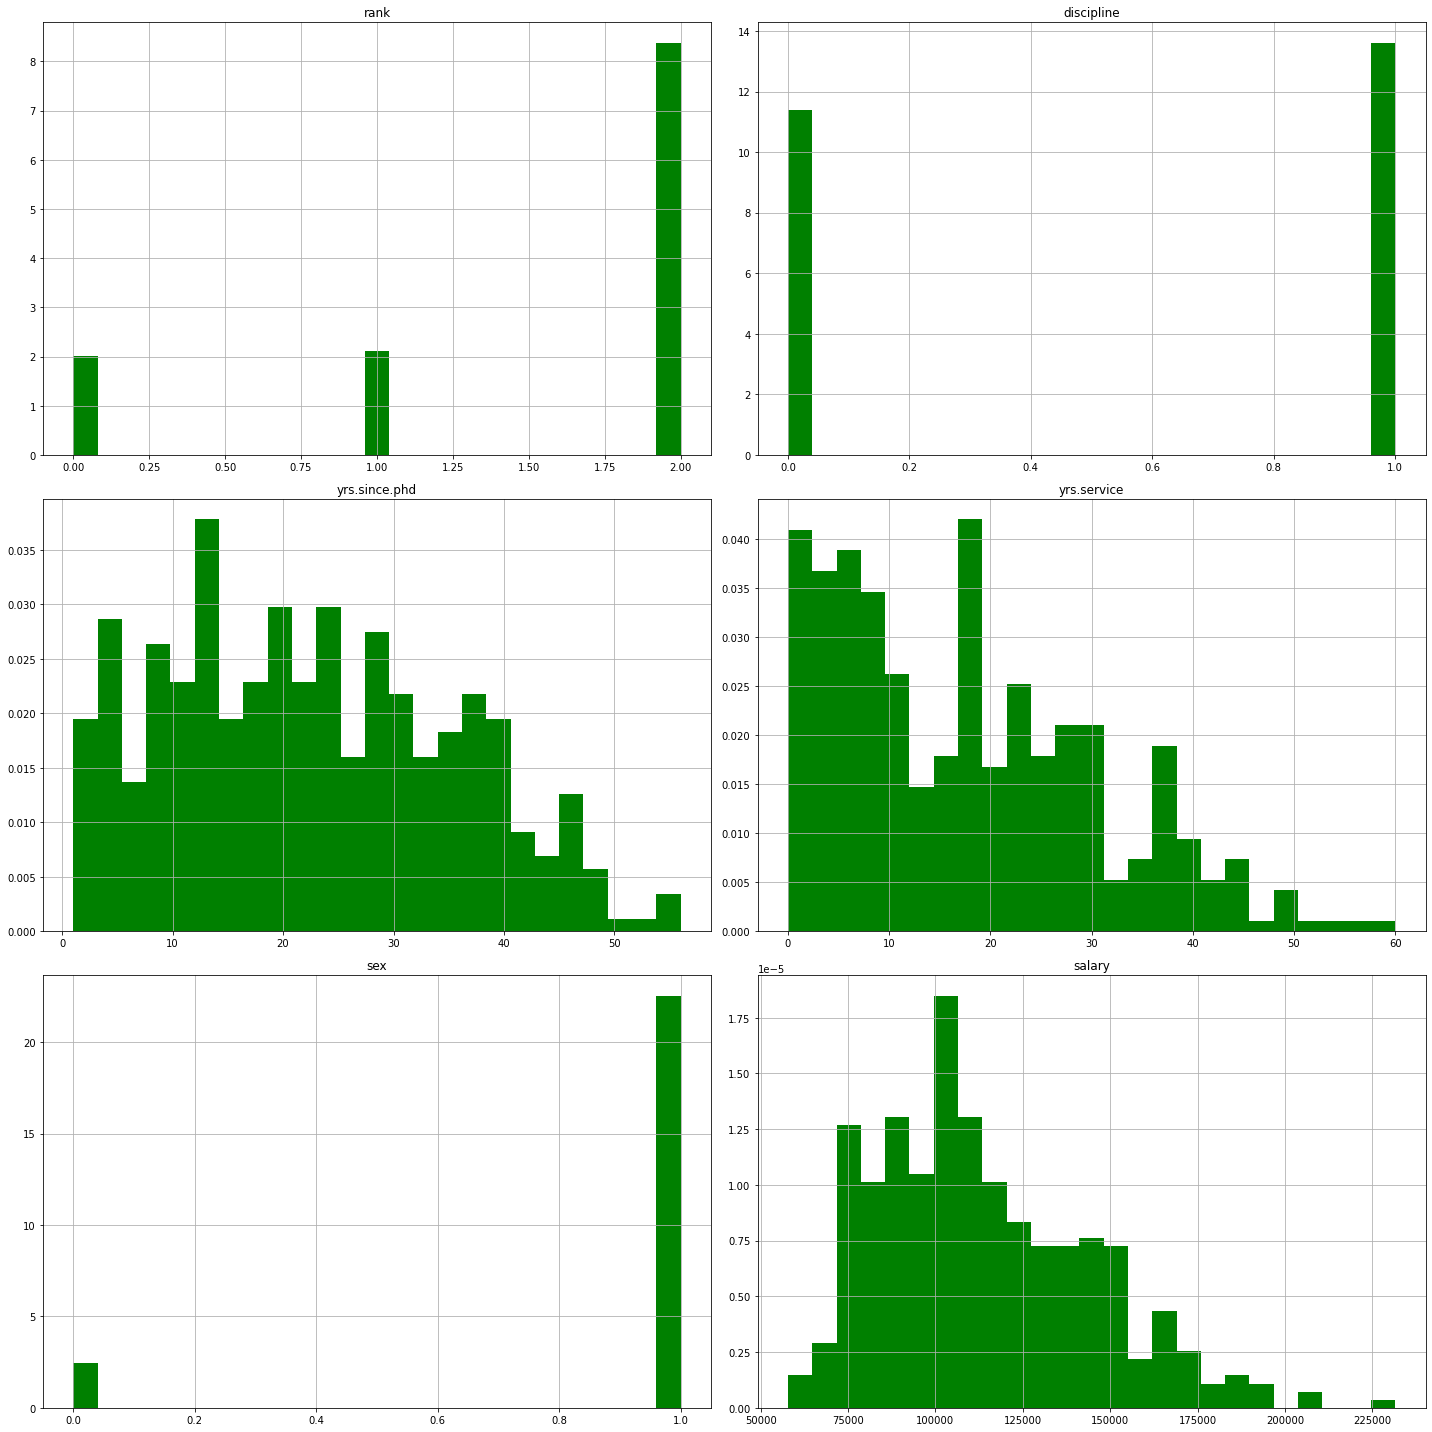

In [28]:
#Lets plot all using Histogram:-
 
plt.rcParams['figure.figsize']=(20,20)
dff.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------------------------------------

# Correlation

In [29]:
dff.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [30]:
dff.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

#### Correlation using Heatmap

<AxesSubplot:>

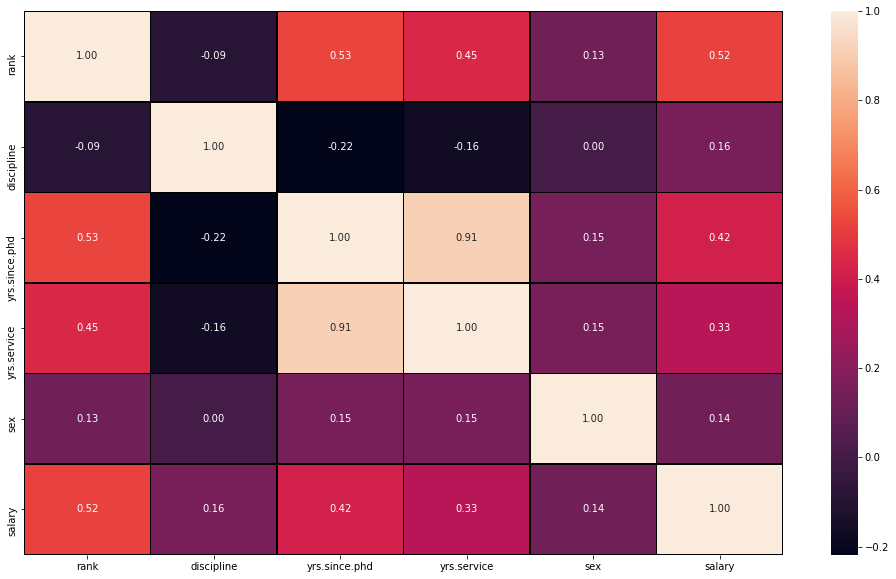

In [31]:
plt.figure(figsize=(17,10))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

###### OUTCOME OF CORRELATION MAP

1. Rank is contributing 52% to salary column
2. Discipline is contributing 16% to salary column
3. yrs.since.phd is contributing 42% to salary column
4. yrs.service is contributing 33% to salary column
5. sex is contributing 14% to salary column. . . . . .



#### --------------------------------------------------========================-------------------------------------======================-----------------------------------

# Descriptive Statistics

###### Describing Database

In [32]:
dff.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


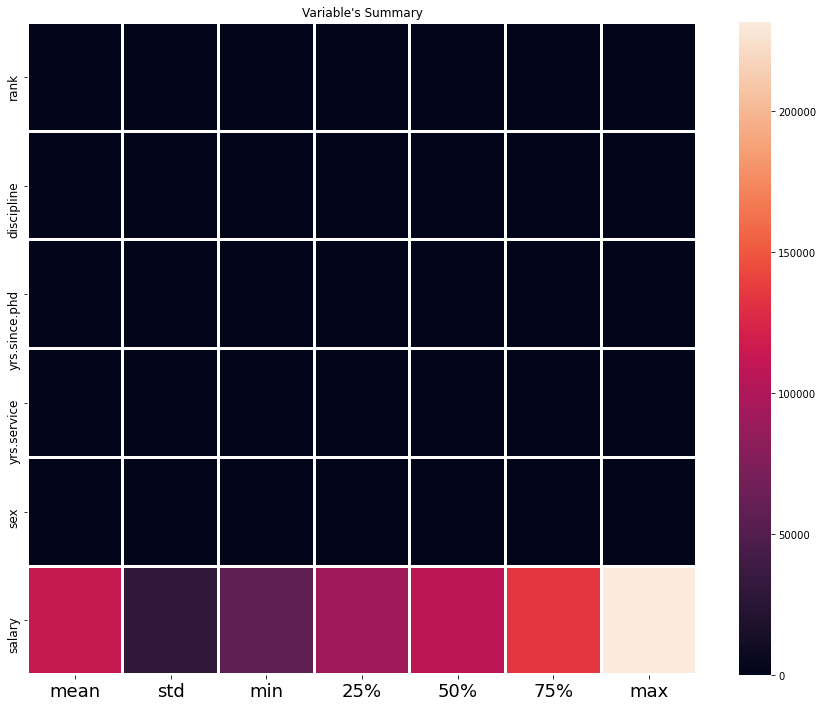

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(round(dff.describe()[1:].transpose(),2),linewidth=2,annot=False,fmt="f")
# we dont want count column that why we have given [1:]
# transpose will convert columns into rows and rows into columns
# we are rounding up the values upto 2 places of decimals
# linewidth gives the thickness of the space between the blocks
# fmt - floating values needs to be consider

plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
# xticks and yticks will define the fontsize of items on x-axis and y-axis

plt.title("Variable's Summary")
plt.show()

In [34]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


## OUTLIERS CHECKING

In [35]:
# here we will make the variable where we will give some values

colmlist=dff.columns.values
ncol=30
nrows=14

In [36]:
colmlist

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

In [37]:
len(colmlist)

6

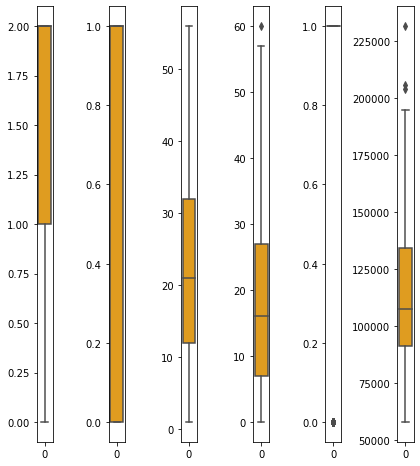

In [38]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= dff[colmlist[i]],color='orange',orient='v')
    plt.tight_layout()

### SKEWNESS

In [39]:
dff.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Normal Distribution curve¶

<AxesSubplot:xlabel='rank', ylabel='Density'>

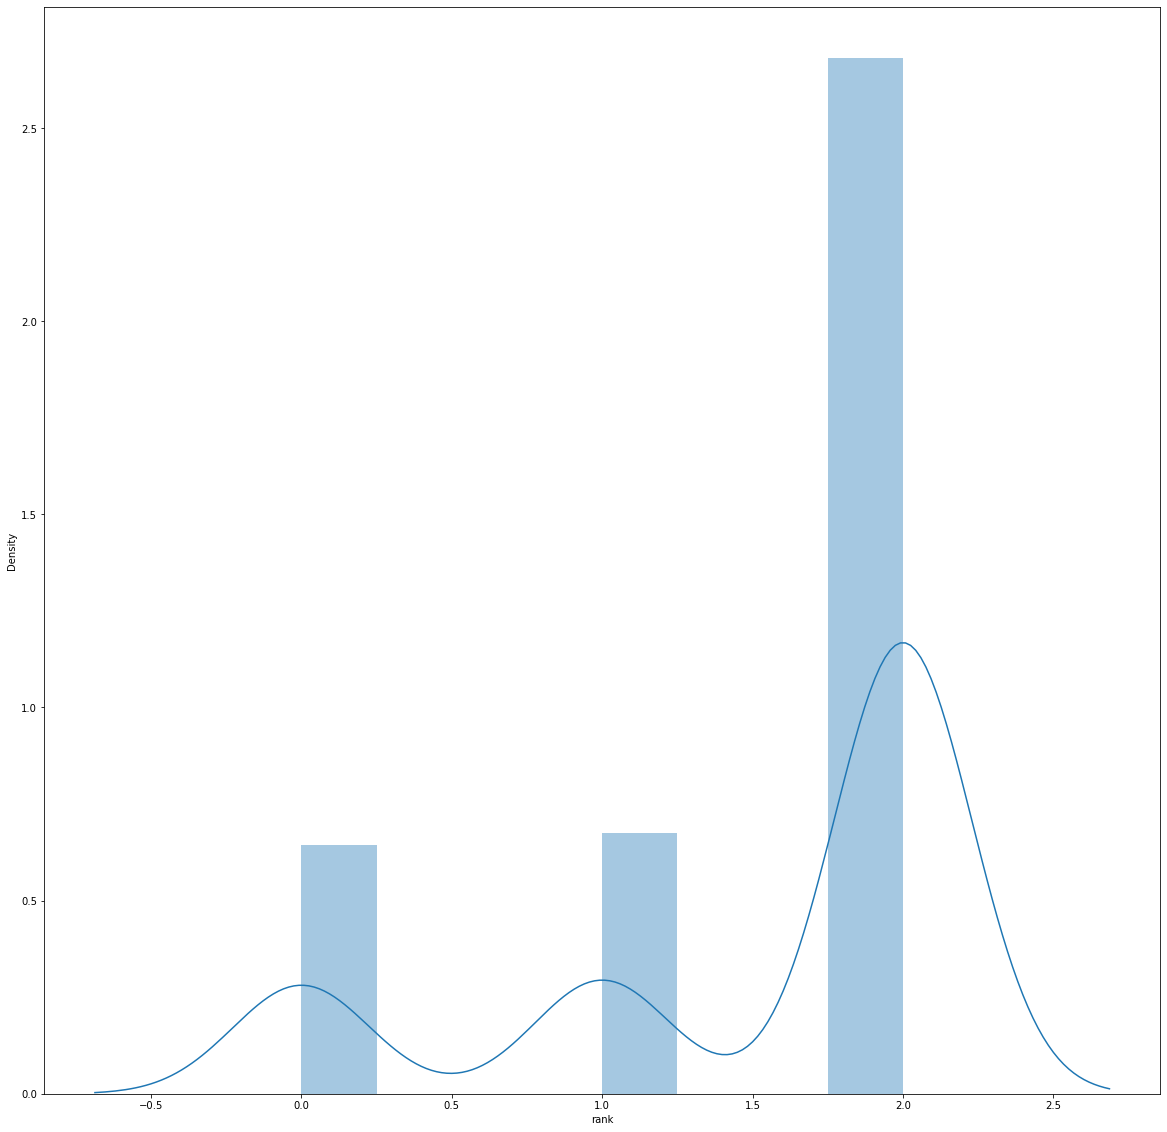

In [40]:
sns.distplot(dff['rank'])

###### Its a 3 model dataset plotting and it is skewed

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

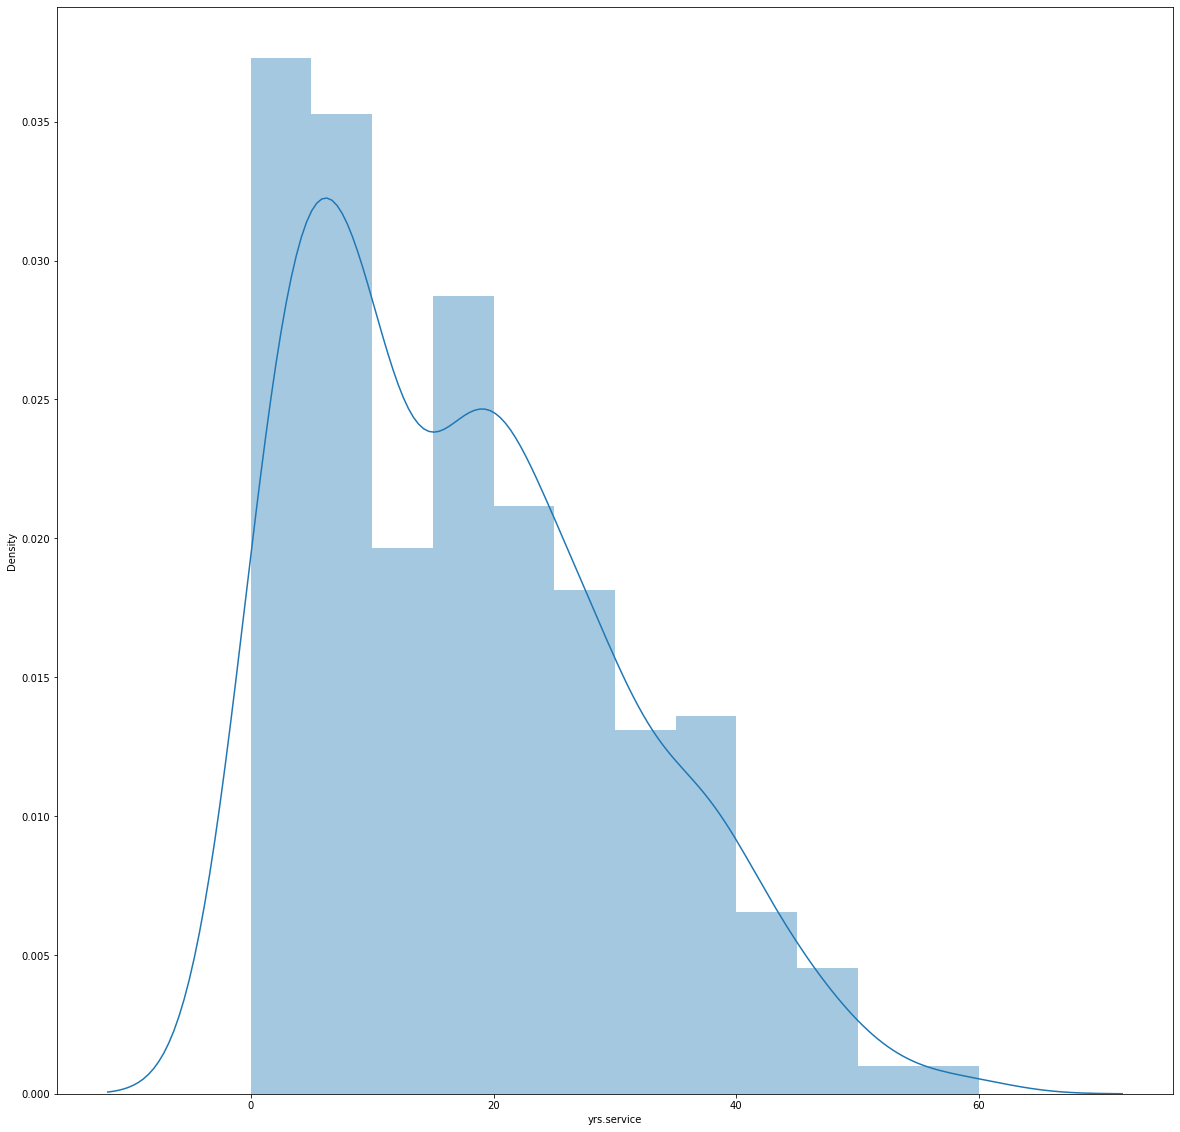

In [41]:
sns.distplot(dff['yrs.service'])

###### This dataset is also skewed ,its right skewed

<AxesSubplot:xlabel='sex', ylabel='Density'>

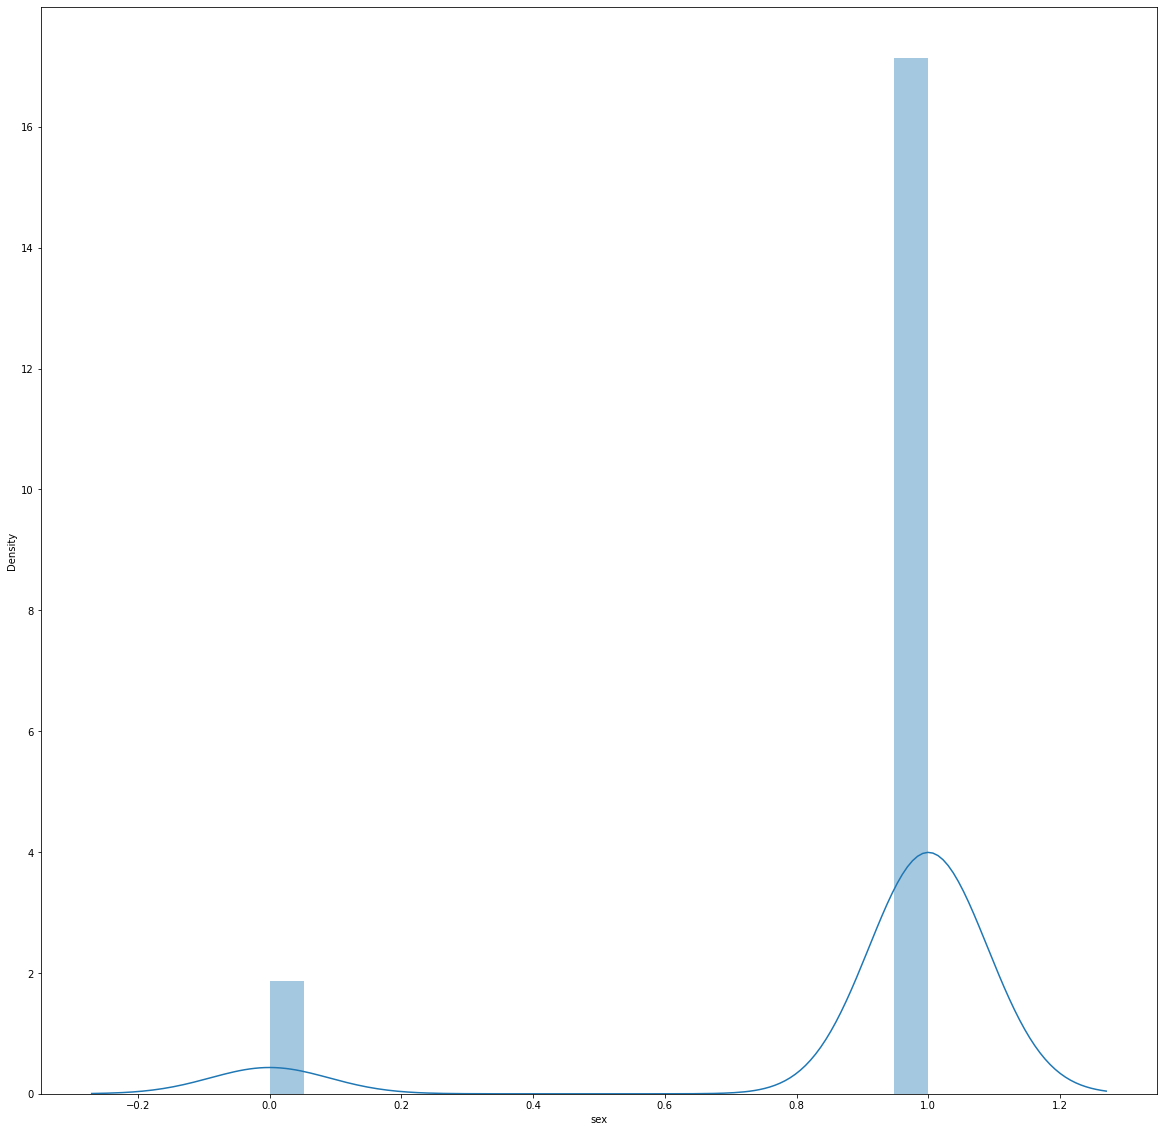

In [42]:
sns.distplot(dff['sex'])

###### It is Bi-model dataset and it is skewed

#### The data of the columns as plotted above is not normalised ...The building block is out of normalized curve¶

# --------------------------------------------------------------------------------------------------------

# Data Cleaning --> data preprocessing¶

In [43]:
# We will extract the Happiness Score  column from the corelation matrixs

dff.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

# REMOVING OUTLIERS

In [44]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(dff))
z.shape

(397, 6)

In [47]:
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [49]:
df_new=dff[(z<3).all(axis=1)]

In [51]:
print ("Old DataFrame =",dff.shape)
print ("New DataFrame =",df_new.shape)
print ("Total dropped rows = ",dff.shape[0] - df_new.shape[0])

Old DataFrame = (397, 6)
New DataFrame = (354, 6)
Total dropped rows =  43


##### PERCENTAGE DATA LOSS

In [52]:
loss_percent=(397-354)/397*100
print (loss_percent,'%')

10.831234256926953 %


###### 10.831234256926953  % is the data which is lossed while removing the Outliers

In [53]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [54]:
# Independent column

x=df_new.iloc[:,0:-1]

In [55]:
x.shape

(354, 5)

In [56]:
# Target or dependent variable

y=df_new.iloc[:,-1]

In [57]:
y.shape

(354,)

# Lets Transform data to remove skewness

In [58]:
from sklearn.preprocessing import power_transform

In [59]:
x=power_transform(x,method='yeo-johnson')

In [60]:
x

array([[ 6.62618673e-01,  9.13343797e-01, -1.69933491e-01,
         2.13910711e-01, -2.32830644e-10],
       [ 6.62618673e-01,  9.13343797e-01, -9.13372290e-02,
         6.56729090e-02, -2.32830644e-10],
       [-1.18533666e+00,  9.13343797e-01, -1.64343352e+00,
        -1.32485378e+00, -2.32830644e-10],
       ...,
       [ 6.62618673e-01, -1.09487797e+00,  1.38580057e+00,
         6.73355211e-01, -2.32830644e-10],
       [ 6.62618673e-01, -1.09487797e+00,  2.82238542e-01,
        -1.21133024e-02, -2.32830644e-10],
       [-1.18533666e+00, -1.09487797e+00, -1.16828402e+00,
        -1.16384273e+00, -2.32830644e-10]])

In [61]:
x.mean()

-4.656605245782489e-11

In [62]:
x.std()

0.8944271909999159

# -----------------------------------------------------------------------------------------------------------

## Since the salary column is in continious data ,so it is a REGRESSION model problem

## Now Apply Machine learning models for regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [121]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [122]:
pred_train=lr.predict(x_train)

In [123]:
pred_test=lr.predict(x_test)

In [124]:
r2_score(y_train,pred_train)

0.38818382542069607

In [125]:
r2_score(y_test,pred_test)

0.3913586921983365

In [126]:
print ("Mean Absolute error ->",mean_absolute_error(y_test,pred_test))
print ("Mean squared error ->",mean_squared_error(y_test,pred_test))

Mean Absolute error -> 16334.201190456408
Mean squared error -> 432975859.5077646


###### we can see that the linear regression model is not performing well

In [127]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_lr)

In [128]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("r2_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 33.97620190931612
r2_score is :- 39.13586921983365


At cv:- 5
Cross validation score is :- 32.70755281052461
r2_score is :- 39.13586921983365


At cv:- 6
Cross validation score is :- 33.83230507300498
r2_score is :- 39.13586921983365


At cv:- 7
Cross validation score is :- 34.50291758117835
r2_score is :- 39.13586921983365


At cv:- 8
Cross validation score is :- 35.54832630267276
r2_score is :- 39.13586921983365


At cv:- 9
Cross validation score is :- 33.75339273335251
r2_score is :- 39.13586921983365




here we will take the value which is very close to cv and r2_score ,at cv 4 the value is very close to r2_score

In [130]:
lsscore_selected= cross_val_score(lr,x,y,cv=8).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe r2_score is:",lss)

The cv score is :-  0.3554832630267276 
The r2_score is: 0.3913586921983365


# Now lets use different regressor model and predict the best score¶

In [131]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train=algorithm_instance.predict(x_train)
    model_1_pred_test=algorithm_instance.predict(x_test)
    print ('r2_score of training model :-',r2_score(y_train,model_1_pred_train))
    print ('r2_score of test data :-',r2_score(y_test,model_1_pred_test))

In [132]:
# Linear rEGRESSION MODEL
model_selection(lr,x_train,y_train,x_test,y_test)

r2_score of training model :- 0.38818382542069607
r2_score of test data :- 0.3913586921983365


In [133]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [134]:
svr=SVR()
model_selection(svr,x_train,y_train,x_test,y_test)

r2_score of training model :- -0.03366529016435127
r2_score of test data :- 1.6933618932624128e-05


In [135]:
dtr=DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

r2_score of training model :- 0.9460860033733709
r2_score of test data :- -0.09362725958444496


In [136]:
rf=RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

r2_score of training model :- 0.8673961172205377
r2_score of test data :- 0.3791522817423384


In [137]:
kn=KNeighborsRegressor()
model_selection(kn,x_train,y_train,x_test,y_test)

r2_score of training model :- 0.6129255954142809
r2_score of test data :- 0.38723966649379593


In [140]:
# lets take KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred_train=kn.predict(x_train)
pred_test=kn.predict(x_test)
print (r2_score(y_train,pred_train))
print (r2_score(y_test,pred_test))

0.6129255954142809
0.38723966649379593


# -------------------------------------------------------------------------------------------

In [166]:
last1=kn.fit(x_train,y_train)

#### now lets save this model

In [167]:
import joblib

In [168]:
joblib.dump(last1,'last1.obj')

['last1.obj']